# Байесовские оценки. Задача 1


__Ильичёв А.С., 693__

In [1]:
import numpy as np
import scipy.stats as sts
from matplotlib import pyplot as plt
%matplotlib inline

#### 1. Сгенерируем выборку $X_1, \dots, X_{100}$  из стандартного нормального распределения.

In [2]:
N = 100
sample = sts.norm().rvs(size=N)

#### 2. Для каждого $n \le N$ в модели $N(0, \theta)$ найдем оценку максимального правдоподобия по выборке  $X_1, \dots, X_n$.

При $a = 0$ оценкой максимального правдоподобия будет $\overline{X^2}$.

In [3]:
ns = np.arange(1, N + 1)
mle = np.array([np.mean(sample[:n] ** 2) for n in ns])

#### 3. Найдем байесовскую оценку, в качестве априорного распределения возьмем сопряженное (несколько параметров). 

Сопряженным распределением для нормального с известным средним является обратное гамма-распределение с плотностью $$p_{\alpha, \beta}(x) = \frac{\beta^\alpha e^{-\beta/x}}{Г(\alpha) x^{\alpha + 1}}.$$ Параметрами апостериорного распределения в нашем случае будут $(\alpha + n/2, \,\beta + \sum_{i = 1}^n X_i^2/2)$, а байесовской оценкой (матожиданием гамма-распределения с такими параметрами) $-$ $$\theta^* = \frac{\beta + \sum_{i = 1}^n X_i^2/2}{\alpha + n/2 - 1}.$$

In [4]:
params = [(1, 1), (1, 2), (1, 0.5), (2, 3), (2, 0.5), (2, 1),  (3, 0.5)]

In [5]:
bay_ests = []
for p in params:
    bay_ests.append(np.array([(p[1] + mle[n - 1] * n / 2)
                              / (p[0] + n/2 - 1)  for n in ns]))

#### 4. Построим  графики абсолютной величины отклонения оценки от истинного значения параметра в зависимости от $n$.

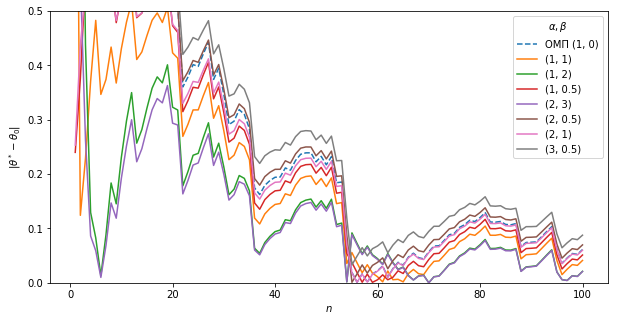

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(ns, np.abs(mle - 1),'--', label='ОМП (1, 0)')
for i, p in enumerate(params):
    plt.plot(ns, np.abs(bay_ests[i] - 1), label=params[i])
plt.legend(title=r'$\alpha, \beta$')
plt.ylim(0, 0.5)
plt.xlabel(r'$n$')
plt.ylabel(r'$|\theta^* - \theta_0|$')

plt.show()

#### 5. Вывод.

Все оценки являются состоятельными. Байесовские оценки и ОМП с увеличением $n$ все ближе сдвигаются друг к другу (потому что различие между байесовскими и ОМП уменьшается, это видно, если поделить числитель и знаменатель в выражении для $\theta^*$ на $n$, отсюда же следует состоятельность баейсовской оценки). При этом в зависимости от параметров априорного распределения байесовская оценка может оказаться как лучше, так и хуже ОМП, что подтверждает важность правильного подбора параметров в байесовском подходе.